# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function k_means() from the package sklearn.cluster to compute *k*-means clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


In [1]:
##Answer to question 4.1.1a
from scipy.io import loadmat
from sklearn.cluster import k_means
from Toolbox.clusterPlot import clusterPlot

synth1 = loadmat("Data/synth1.mat")
X1 = synth1["X"]
y1 = synth1["y"]

K = 4
centroids, labels, inertia = k_means(X1, K)

clusterPlot(X1, labels, centroids, y1)

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

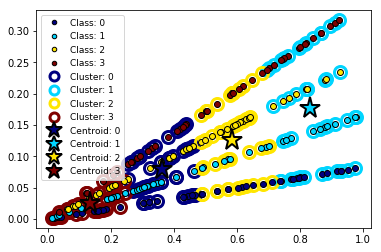

In [2]:
##Answer to question 4.1.1b
synth2 = loadmat("Data/synth2.mat")
X2 = synth2["X"]
y2 = synth2["y"]
centroids, labels, inertia = k_means(X2, K)
clusterPlot(X2, labels, centroids, y2)

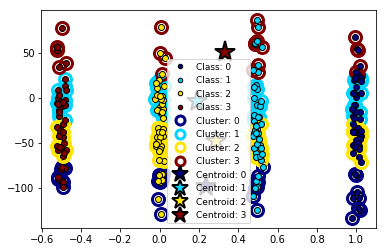

In [3]:
synth3 = loadmat("Data/synth3.mat")
X3 = synth3["X"]
y3 = synth3["y"]
centroids, labels, inertia = k_means(X3, K)
clusterPlot(X3, labels, centroids, y3)

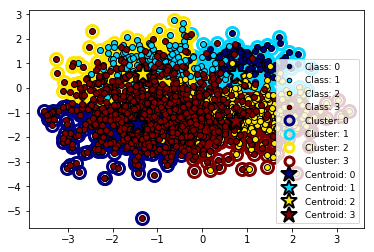

In [4]:
synth4 = loadmat("Data/synth4.mat")
X4 = synth4["X"]
y4 = synth4["y"]
centroids, labels, inertia = k_means(X4, K)
clusterPlot(X4, labels, centroids, y4)

### Answer for 4.1.1b here:
synth1:     
The clustering here coincides very well with the true classes, there seems to be only one 'misclassified' data point around (0,-1). We assume that the reason it works so well here is that the true clusters are globular, similar in size and density, which all are requirements for successful k-means clustering.

synth2:  
The clustering found by k-means here does not coincide well with the true classes. This is because the true clusters are very much non-globular. So even though they are similar in size and density, k-means fails to make meaningful clusters.

synth3:  
Again, the clustering is not a good fit for the true classes. The reason seems similar to above, although the true clusters are similar in size and density, they are not globular.

synth4:  
Here it is more difficult to see whether classes are clustered correctly, especially in the center where the density of data points is very high. Around the edges though, it seems that the classes are somewhat correctly captured by the clusters and only border points are grouped wrongly. Overall k-means seems to do decently well here, especially considering how close together and overlapping the true clusters are.  
This might be due to the fact that there are no 'standard' problems for k-means clustering here. The true clusters all seem globular, similar in density and only slighty different in size.

Note:  
We realize there are no labels or titles on the graphs but since these were generated by code that was provided, we did not think it was necessary to change it.


Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

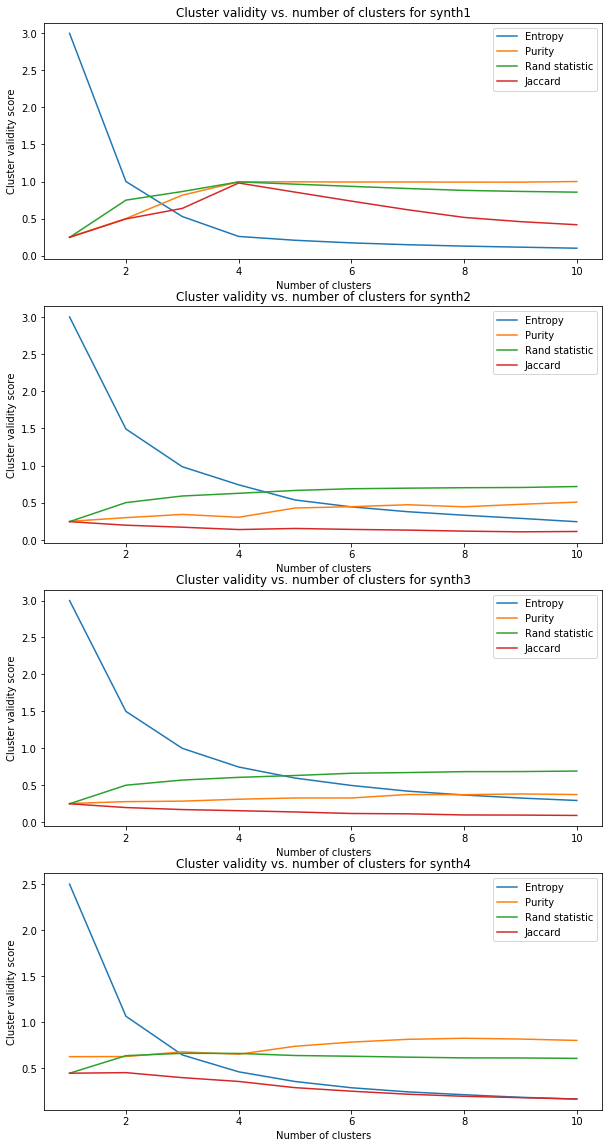

In [5]:
##Answer to question 4.1.2a
from Toolbox.clusterVal import clusterVal
import numpy as np
import matplotlib.pyplot as plt

Xs = [X1, X2, X3, X4]
ys = [y1, y2, y3, y4]
K = 10
fig, axes = plt.subplots(4, figsize = (10,20))

## Loop through synth datasets
for i, axis in enumerate(axes):
    entropy = np.zeros(K)
    purity = np.zeros(K)
    rand = np.zeros(K)
    jaccard = np.zeros(K)
    
    ## Loop through K
    for k in range (K):
        centroids, labels, inertia = k_means(Xs[i], k+1)
        e, p, r, j = clusterVal(ys[i], labels)
        entropy[k] = e
        purity[k] = p
        rand[k] = r
        jaccard[k] = j
    
    axis.plot(range(1,K+1), np.array([entropy, purity, rand, jaccard]).T)
    axis.set_title("Cluster validity vs. number of clusters for synth{}".format(i+1))
    axis.set_ylabel("Cluster validity score")
    axis.set_xlabel("Number of clusters")
    axis.legend(['Entropy', 'Purity', 'Rand statistic', 'Jaccard'], loc='upper right')

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

### Answer for 4.1.2b:
In general, due to the nature of the different validity measurements, to determine the ideal number of clusters you would want to aim for purity, rand statistic and Jaccard coefficient to be as high as possible (with a max. of 1) while entropy should be as low as possible.  
Specifically in this example we know from the cluster plots made in 4.1.1 that synth1 was the only data where there was a clear, near to perfect clustering for K=4 . It shows in the plot that indeed purity, rand statistic and Jaccard coefficient peak at K=4  with a score of 1 (or close) and after that either decline or stay the same. The entropy is fairly low at this point and only slighty decreases (flattens off) with a higher K. 
When more than 4 clusters are used Jaccard tends to be fairly low, while rand is still quite high (and also pretty steady). Purity tends to go up as more clusters are used, which seems intuitive since the more you split up data in to more clusters, the purer the clusters tend to be, even though thats not really desirable. Entropy always goes down strongly with the amount of clusters.


*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


In [16]:
##Answer to question 4.1.3a
wildfaces = loadmat("Data/wildfaces.mat")

X = wildfaces["X"]

K = 10
centroids, labels, inertia = k_means(X, K)

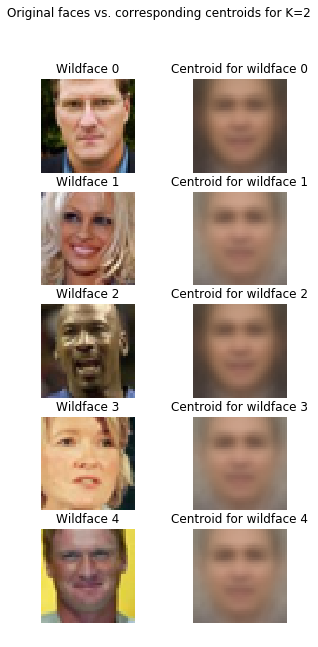

In [43]:
##Plotting
fig, axes = plt.subplots(5,2, figsize = (5,10))
fig.suptitle('Original faces vs. corresponding centroids for K={}'.format(K), fontsize=12)

for i, axis in enumerate(axes):
    axis[0].imshow(np.reshape(X[i,:],(3,40,40)).T)
    axis[1].imshow(np.reshape(centroids[labels[i],:],(3,40,40)).T)
    axis[0].set_title("Wildface {}".format(i))
    axis[1].set_title("Centroid for wildface {}".format(i))
    axis[0].axis('off') # We remove the axis numbering here since there is no meaningful reason for it (hence also no labels)
    axis[1].axis('off')

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

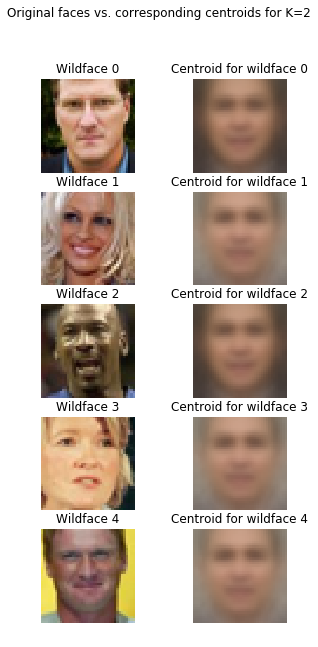

In [44]:
##Answer to question 4.1.3b
K = 2
centroids, labels, inertia = k_means(X, K)

fig, axes = plt.subplots(5,2, figsize = (5,10))
fig.suptitle('Original faces vs. corresponding centroids for K={}'.format(K), fontsize=12)

for i, axis in enumerate(axes):
    axis[0].imshow(np.reshape(X[i,:],(3,40,40)).T)
    axis[1].imshow(np.reshape(centroids[labels[i],:],(3,40,40)).T)
    axis[0].set_title("Wildface {}".format(i))
    axis[1].set_title("Centroid for wildface {}".format(i))
    axis[0].axis('off')
    axis[1].axis('off')

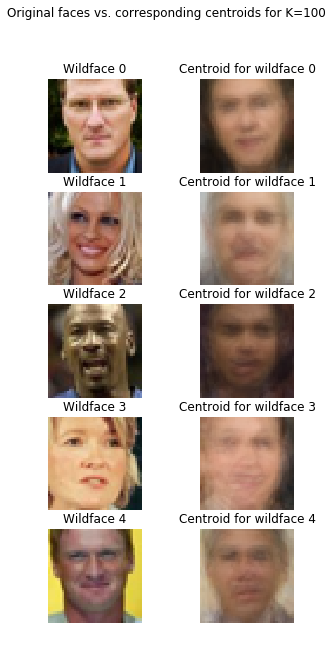

In [45]:
##Answer to question 4.1.3b
K = 100
centroids, labels, inertia = k_means(X, K)

fig, axes = plt.subplots(5,2, figsize = (5,10))
fig.suptitle('Original faces vs. corresponding centroids for K={}'.format(K), fontsize=12)

for i, axis in enumerate(axes):
    axis[0].imshow(np.reshape(X[i,:],(3,40,40)).T)
    axis[1].imshow(np.reshape(centroids[labels[i],:],(3,40,40)).T)
    axis[0].set_title("Wildface {}".format(i))
    axis[1].set_title("Centroid for wildface {}".format(i))
    axis[0].axis('off')
    axis[1].axis('off')

### Answer for 4.1.3b

For K=10 the faces are not very recognizable, which makes sense since 1000 faces are 'pressed into' just 10. There are some general properties of the images that are captured, like the brightness of the background/surrounding and the skintone.
When decreasing the clusters, to K=2, the only thing captured by the compression is the fact that the images are faces. The two possible centroids are very generic, symmetrical outlines of faces, with the only difference being the background color.  
When increasing K to 100, more information is represented. Now information like orientation of the head becomes visible and background and skin color are more accurate. The general face features like eyes and nose become blurrier here though.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

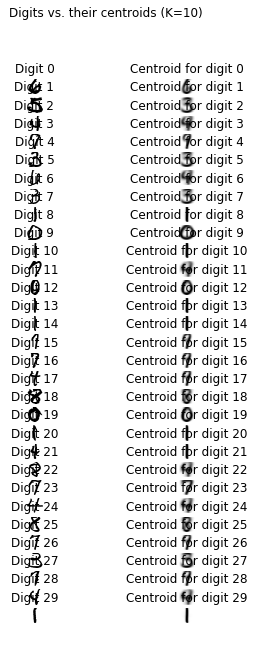

In [60]:
##Answer to question 4.1.4a
digits = loadmat("Data/digits.mat")
X = digits['X']

K = 10
centroids, labels, inertia = k_means(X, K)

fig, axes = plt.subplots(10, 2, figsize = (5,10))
fig.suptitle('Digits vs. their centroids (K={})'.format(K), fontsize=12)

for i, axis in enumerate(axes):
    axis[0].imshow(np.reshape(X[i,:],(16,16)), cmap = plt.cm.binary)
    axis[1].imshow(np.reshape(centroids[labels[i],:],(16,16)), cmap = plt.cm.binary)
    axis[0].set_title("Digit {}".format(i))
    axis[1].set_title("Centroid for digit {}".format(i))
    axis[0].axis('off')
    axis[1].axis('off')

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

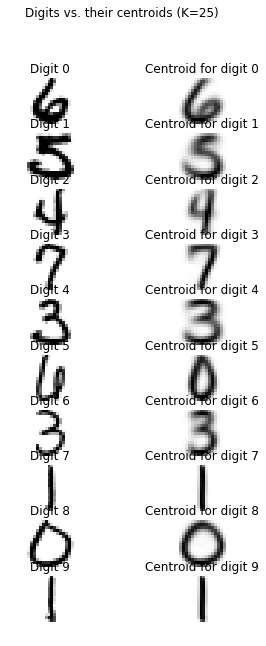

In [59]:
##Answer to question 4.1.4b
K = 25
centroids, labels, inertia = k_means(X, K)

fig, axes = plt.subplots(10, 2, figsize = (5,10))
fig.suptitle('Digits vs. their centroids (K={})'.format(K), fontsize=12)

for i, axis in enumerate(axes):
    axis[0].imshow(np.reshape(X[i,:],(16,16)), cmap = plt.cm.binary)
    axis[1].imshow(np.reshape(centroids[labels[i],:],(16,16)), cmap = plt.cm.binary)
    axis[0].set_title("Digit {}".format(i))
    axis[1].set_title("Centroid for digit {}".format(i))
    axis[0].axis('off')
    axis[1].axis('off')

### Answer for 4.1.3b

The reason that K=10 does not result in 10 perfect clusters is that some digits, since they are handwritten, might more similar to another digit 'template' than to their own. Since clustering is unsupervised learning the digits are grouped together according to their similarity (regardless to their true class) and especially 'odd' looking digits are likely to be misgrouped. For example digit 3, which is really a 7, is so curved that it looks more like a 9.

Our idea was that increasing K slightly should give a better representation, so that for example different ways of writing a 7 could be grouped in different clusters. At K=25 the representation is a little better, but there are still some misclassified digits. Also at some point it seems that too many clusters just result in blurry mixtures of digits (around K=30).

Especially 7 and 9s tend to be confused, also 4s are confused with 9s or 0s sometimes. This is probably because for 7 and 4 there are several ways of writing them, some write a 4 with an open top, some close it. The distinct digits, like 1, 0 and 3 are mostly classified correctly since they are not too similar to others.

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

In [ ]:
##Answer to question 4.2.1a

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

In [ ]:
##Answer to question 4.2.1b

*Double click to type your answer for 4.1.3b here:*

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.